In [7]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk

# download stopwords & punkt & VADER
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon') 

[nltk_data] Downloading package stopwords to /home/rkovar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rkovar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rkovar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
tweets_df = pd.read_csv('tweets.csv')
#movie_id is one above what it is supposed to be in movies_df
tweets_df['movie_id'] = tweets_df['movie_id'] - 1
tweets_df

,tweet,movie,movie_id
0,@SpiderManMovie @HarryHolland99 @IMAX @DolbyCi...,Spider-Man: No Way Home,0
1,@A_C_Mitchell @molly_kraus @MarvelStudios @Spi...,Spider-Man: No Way Home,0
2,“Spider Man trailer and stock prices”… Story |...,Spider-Man: No Way Home,0
3,@Gamer21690 @SpiderManMovie too obsessed,Spider-Man: No Way Home,0
4,Looking forward to Spider-Man tonight. If anyo...,Spider-Man: No Way Home,0
...,...,...,...
801924,one minute into red rocket and I already know ...,Red Rocket,99
801925,Red Rocket was a wild dirty and cool movie. Si...,Red Rocket,99
801926,Honestly surprised Simon Rex is not getting mo...,Red Rocket,99
801927,Red Rocket is a good movie ❤️ https://t.co/TXz...,Red Rocket,99


In [9]:
movies_df = pd.read_csv('processed_movies.csv')
movies_df['Released'] = movies_df['Released'].apply(pd.to_datetime) #transforms our string values in column Released into a datetime object
movies_df.columns = ['released', 'movie', 'domestic', 'international', 'worldwide']
movies_df.head()

,released,movie,domestic,international,worldwide
0,2021-12-17,Spider-Man: No Way Home,"$804,617,772","$1,083,808,579","$1,888,426,351"
1,2021-09-03,Shang-Chi and the Legend of the Ten R…,"$224,543,292","$207,700,000","$432,243,292"
2,2021-10-01,Venom: Let There be Carnage,"$213,550,366","$288,050,013","$501,600,379"
3,2021-07-09,Black Widow,"$183,651,655","$196,100,000","$379,751,655"
4,2021-06-25,F9: The Fast Saga,"$173,005,945","$548,072,000","$721,077,945"


In [10]:
# Process the tweets first
def clean_text(text):
# Removes all special characters and numericals leaving the alphabets
    to_return = ''
    for word in text.split():
        if not '@' in word and not 'https:' in word:
            to_return += word + " "

    to_return = to_return.replace("#","")
    return to_return[0:len(to_return)-1]

test_clean = clean_text(tweets_df.iloc[0]['tweet'])
tweets_df["tweet_clean"] = tweets_df['tweet'].apply(clean_text)
tweets_df.head()

,tweet,movie,movie_id,tweet_clean
0,@SpiderManMovie @HarryHolland99 @IMAX @DolbyCi...,Spider-Man: No Way Home,0,SpiderMan has saved the movie going experience!!!
1,@A_C_Mitchell @molly_kraus @MarvelStudios @Spi...,Spider-Man: No Way Home,0,Yes- so good! Grab extra napkins with your pop...
2,“Spider Man trailer and stock prices”… Story |...,Spider-Man: No Way Home,0,“Spider Man trailer and stock prices”… Story |...
3,@Gamer21690 @SpiderManMovie too obsessed,Spider-Man: No Way Home,0,too obsessed
4,Looking forward to Spider-Man tonight. If anyo...,Spider-Man: No Way Home,0,Looking forward to Spider-Man tonight. If anyo...


In [22]:
bw_tweets = tweets_df[tweets_df['movie'] == 'Black Widow']
bw_tweets

,tweet,movie,movie_id,tweet_clean
206300,WHOA! #BlackWidow makes $218 Million it’s open...,Black Widow,3,WHOA! BlackWidow makes $218 Million it’s openi...
206301,Checked out the Black widow movie this weekend...,Black Widow,3,Checked out the Black widow movie this weekend...
206302,my favorite horror movie has to be the black w...,Black Widow,3,my favorite horror movie has to be the black w...
206303,People are paying to watch a movie in theaters...,Black Widow,3,People are paying to watch a movie in theaters...
206304,If you’ve seen #BlackWidow please check out th...,Black Widow,3,If you’ve seen BlackWidow please check out thi...
...,...,...,...,...
281709,I loved black widow not my fave marvel movie b...,Black Widow,3,I loved black widow not my fave marvel movie b...
281710,Endgame i know but can we get another #BlackWi...,Black Widow,3,Endgame i know but can we get another BlackWid...
281711,Sometimes it's harder to watch movies... #Blac...,Black Widow,3,Sometimes it's harder to watch movies... Black...
281712,Black widow Luca Captain America and the winte...,Black Widow,3,Black widow Luca Captain America and the winte...


In [18]:
# Tokenize
from nltk.tokenize import word_tokenize
bw_tweets['tweet_token'] = bw_tweets['tweet_clean'].apply(word_tokenize)
bw_tweets.head()

,tweet,movie,movie_id,tweet_clean,tweet_token
801035,@DawsonEJoyce That movie and Red Rocket aren't...,Red Rocket,99,That movie and Red Rocket aren't playing at th...,"[That, movie, and, Red, Rocket, are, n't, play..."
801036,Red Rocket (2022 Movie) Official Red Band Trai...,Red Rocket,99,Red Rocket (2022 Movie) Official Red Band Trai...,"[Red, Rocket, (, 2022, Movie, ), Official, Red..."
801037,Red Rocket (2022 Movie) Official Red Band Trai...,Red Rocket,99,Red Rocket (2022 Movie) Official Red Band Trai...,"[Red, Rocket, (, 2022, Movie, ), Official, Red..."
801038,@BKWelles The local art house sold quite a few...,Red Rocket,99,The local art house sold quite a few tickets t...,"[The, local, art, house, sold, quite, a, few, ..."
801039,That's right it's coming! We're bringing you S...,Red Rocket,99,That's right it's coming! We're bringing you S...,"[That, 's, right, it, 's, coming, !, We, 're, ..."


In [19]:
# Remove stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
bw_tweets['tweet_stop'] = bw_tweets['tweet_token'].apply(lambda x: [item for item in x if item not in stop_words])
bw_tweets.head()

,tweet,movie,movie_id,tweet_clean,tweet_token,tweet_stop
801035,@DawsonEJoyce That movie and Red Rocket aren't...,Red Rocket,99,That movie and Red Rocket aren't playing at th...,"[That, movie, and, Red, Rocket, are, n't, play...","[That, movie, Red, Rocket, n't, playing, theat..."
801036,Red Rocket (2022 Movie) Official Red Band Trai...,Red Rocket,99,Red Rocket (2022 Movie) Official Red Band Trai...,"[Red, Rocket, (, 2022, Movie, ), Official, Red...","[Red, Rocket, (, 2022, Movie, ), Official, Red..."
801037,Red Rocket (2022 Movie) Official Red Band Trai...,Red Rocket,99,Red Rocket (2022 Movie) Official Red Band Trai...,"[Red, Rocket, (, 2022, Movie, ), Official, Red...","[Red, Rocket, (, 2022, Movie, ), Official, Red..."
801038,@BKWelles The local art house sold quite a few...,Red Rocket,99,The local art house sold quite a few tickets t...,"[The, local, art, house, sold, quite, a, few, ...","[The, local, art, house, sold, quite, tickets,..."
801039,That's right it's coming! We're bringing you S...,Red Rocket,99,That's right it's coming! We're bringing you S...,"[That, 's, right, it, 's, coming, !, We, 're, ...","[That, 's, right, 's, coming, !, We, 're, brin..."


In [20]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

bw_tweets['tweet_stem'] = bw_tweets['tweet_stop'].apply(lambda x: [ps.stem(y) for y in x])
bw_tweets.head()

,tweet,movie,movie_id,tweet_clean,tweet_token,tweet_stop,tweet_stem
801035,@DawsonEJoyce That movie and Red Rocket aren't...,Red Rocket,99,That movie and Red Rocket aren't playing at th...,"[That, movie, and, Red, Rocket, are, n't, play...","[That, movie, Red, Rocket, n't, playing, theat...","[that, movi, red, rocket, n't, play, theater, ..."
801036,Red Rocket (2022 Movie) Official Red Band Trai...,Red Rocket,99,Red Rocket (2022 Movie) Official Red Band Trai...,"[Red, Rocket, (, 2022, Movie, ), Official, Red...","[Red, Rocket, (, 2022, Movie, ), Official, Red...","[red, rocket, (, 2022, movi, ), offici, red, b..."
801037,Red Rocket (2022 Movie) Official Red Band Trai...,Red Rocket,99,Red Rocket (2022 Movie) Official Red Band Trai...,"[Red, Rocket, (, 2022, Movie, ), Official, Red...","[Red, Rocket, (, 2022, Movie, ), Official, Red...","[red, rocket, (, 2022, movi, ), offici, red, b..."
801038,@BKWelles The local art house sold quite a few...,Red Rocket,99,The local art house sold quite a few tickets t...,"[The, local, art, house, sold, quite, a, few, ...","[The, local, art, house, sold, quite, tickets,...","[the, local, art, hous, sold, quit, ticket, 's..."
801039,That's right it's coming! We're bringing you S...,Red Rocket,99,That's right it's coming! We're bringing you S...,"[That, 's, right, it, 's, coming, !, We, 're, ...","[That, 's, right, 's, coming, !, We, 're, brin...","[that, 's, right, 's, come, !, we, 're, bring,..."


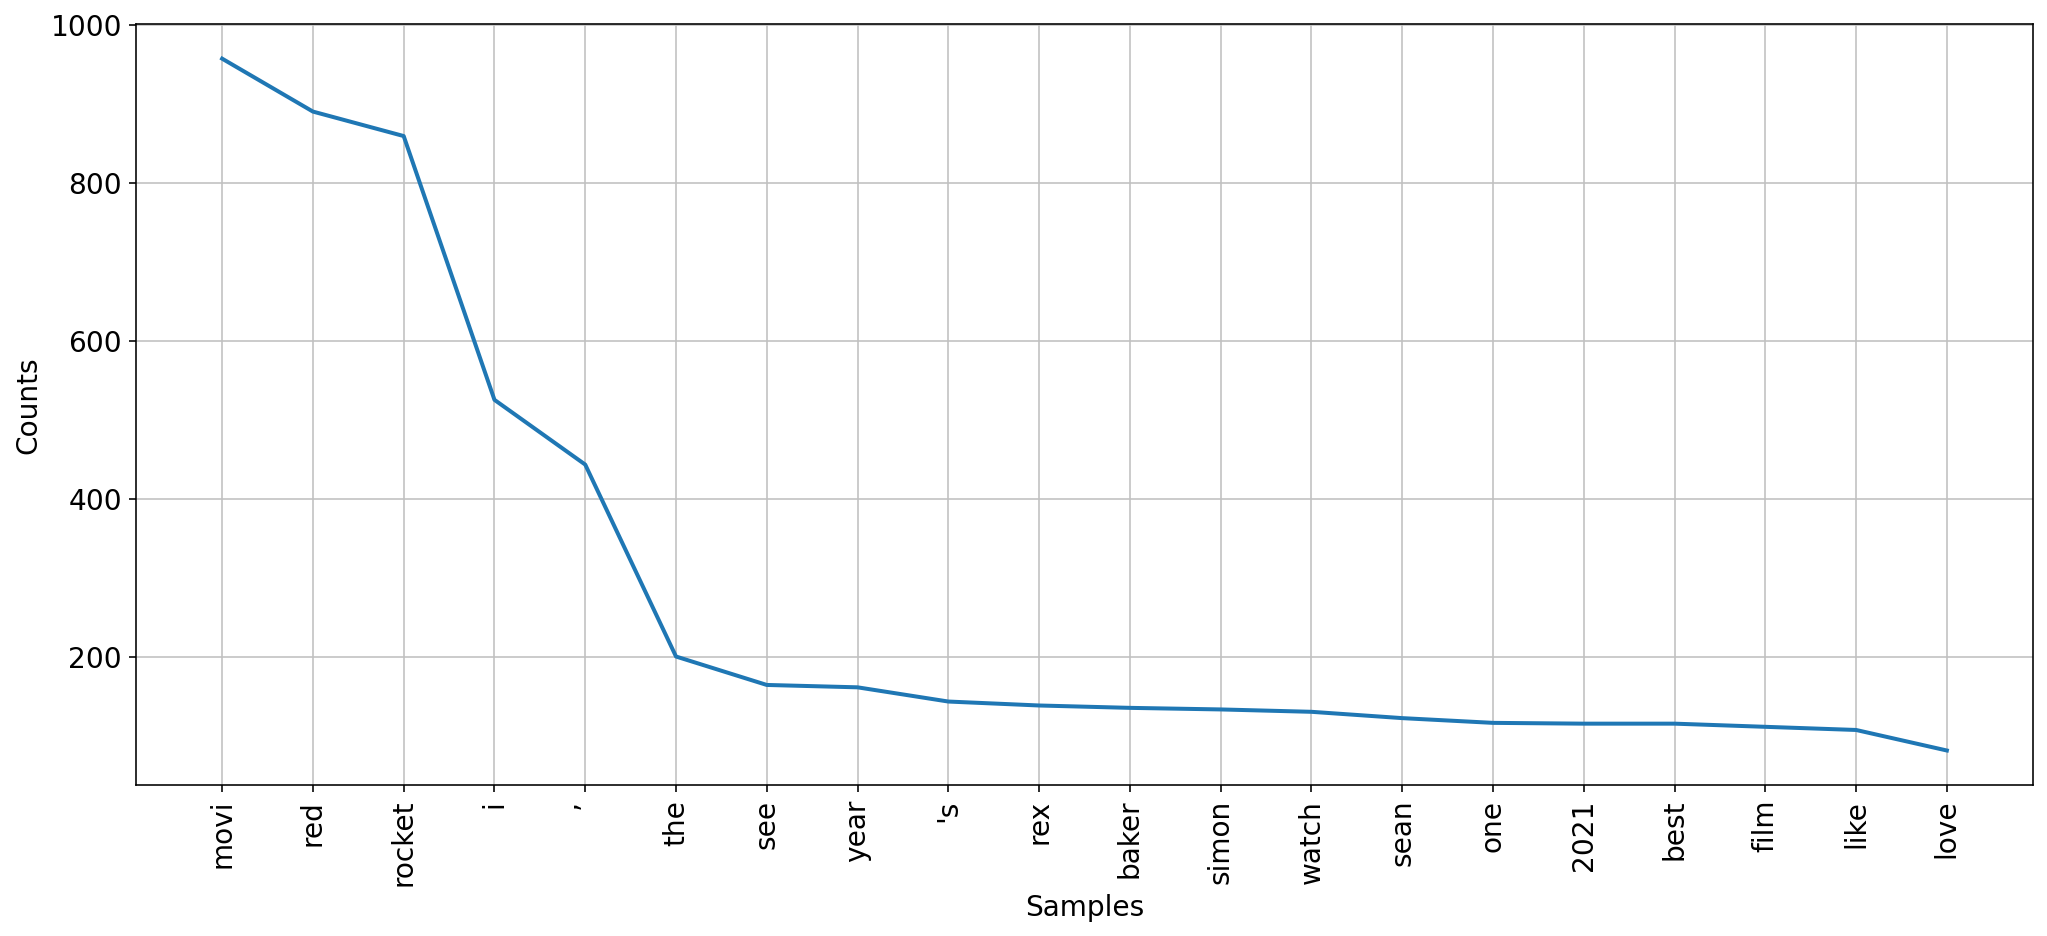

In [21]:
# get words after stemming
tweet_series = bw_tweets.squeeze()
tweet_stem = tweet_series['tweet_stem'].apply(pd.Series).stack()

from nltk.probability import FreqDist
import string

#calculate word frequency
fdist_tweets = FreqDist(tweet_stem)
#delete punctuation counts
for punc in string.punctuation:
    del fdist_tweets[punc]

#get top 20 words
fdist_tweets.plot(20, cumulative=False);

In [9]:
# VADER sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()
test_tweet = tweets_df.iloc[0]['tweet_clean']
print(test_tweet)
print(analyser.polarity_scores(test_tweet))

SpiderMan has saved the movie going experience!!!
{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.5684}


In [10]:
sentiment_df = pd.DataFrame()
sentiment_df['tweet_clean'] = tweets_df['tweet_clean']
sentiment_df['sentiment'] = tweets_df['tweet_clean'].apply(analyser.polarity_scores)
sentiment_df.head()

,tweet_clean,sentiment
0,SpiderMan has saved the movie going experience!!!,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou..."
1,Yes- so good! Grab extra napkins with your pop...,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou..."
2,“Spider Man trailer and stock prices”… Story |...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,too obsessed,"{'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'compou..."
4,Looking forward to Spider-Man tonight. If anyo...,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou..."


In [11]:
def spread_sentiment(sentiment_obj, category):
    return sentiment_obj[category]
sentiment_df['compound'] = sentiment_df['sentiment'].apply(lambda x: spread_sentiment(x, 'compound'))
sentiment_df['neg'] = sentiment_df['sentiment'].apply(lambda x: spread_sentiment(x, 'neg'))
sentiment_df['neu'] = sentiment_df['sentiment'].apply(lambda x: spread_sentiment(x, 'neu'))
sentiment_df['pos'] = sentiment_df['sentiment'].apply(lambda x: spread_sentiment(x, 'pos'))
sentiment_df.drop(columns=['sentiment'], inplace=True)
sentiment_df.head()

,tweet_clean,compound,neg,neu,pos
0,SpiderMan has saved the movie going experience!!!,0.5684,0.00,0.62,0.38
1,Yes- so good! Grab extra napkins with your pop...,0.7339,0.00,0.66,0.34
2,“Spider Man trailer and stock prices”… Story |...,0.0000,0.00,1.00,0.00
3,too obsessed,-0.1779,0.63,0.37,0.00
4,Looking forward to Spider-Man tonight. If anyo...,-0.6875,0.25,0.75,0.00


In [12]:
# assign labels
def compound_to_label(compound_score):
    if(compound_score >= 0.05): return 'pos'
    if(compound_score <= -0.05): return 'neg'
    return 'neu'

sentiment_df['label'] = sentiment_df['compound'].apply(compound_to_label)
sentiment_df.head()

,tweet_clean,compound,neg,neu,pos,label
0,SpiderMan has saved the movie going experience!!!,0.5684,0.00,0.62,0.38,pos
1,Yes- so good! Grab extra napkins with your pop...,0.7339,0.00,0.66,0.34,pos
2,“Spider Man trailer and stock prices”… Story |...,0.0000,0.00,1.00,0.00,neu
3,too obsessed,-0.1779,0.63,0.37,0.00,neg
4,Looking forward to Spider-Man tonight. If anyo...,-0.6875,0.25,0.75,0.00,neg


In [13]:
# Drop neutral ones
print('before', sentiment_df.shape)
sentiment_df.drop(sentiment_df[sentiment_df.label == 'neu'].index, inplace=True)
print('after', sentiment_df.shape)

before (801929, 6)
after (650046, 6)
